Python plots of the figures in the figs folder. They compare MEEM and Capytaine values across wavenumbers for a few different configurations.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.colors import to_rgb

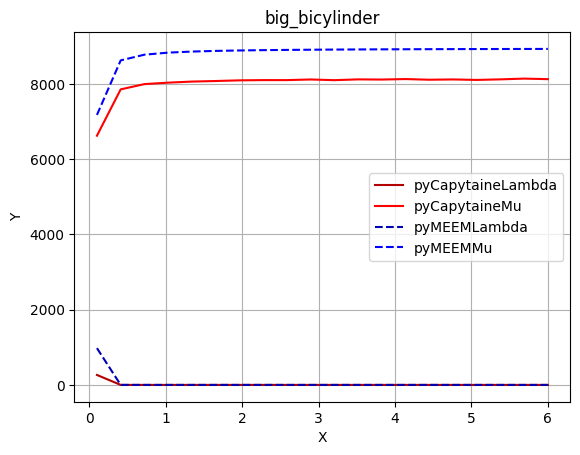

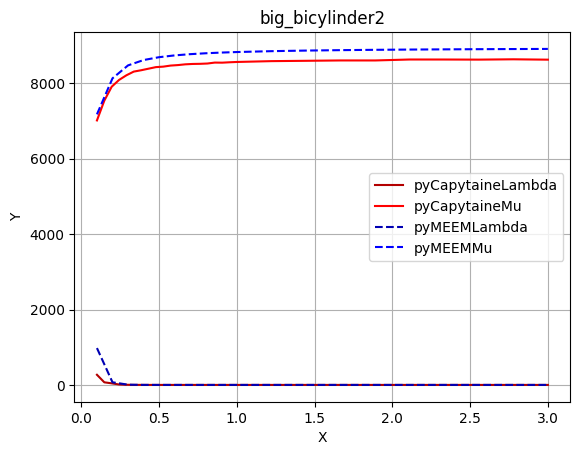

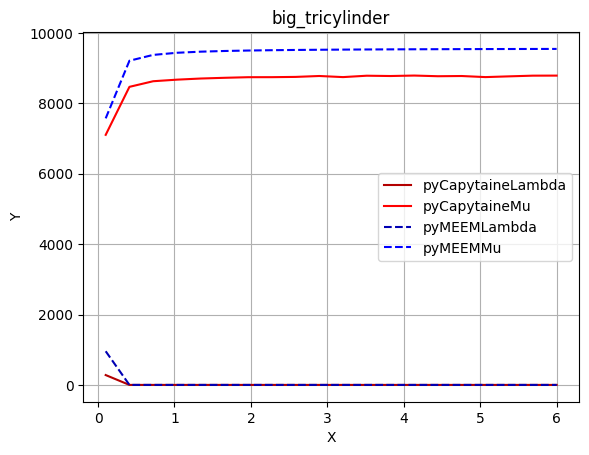

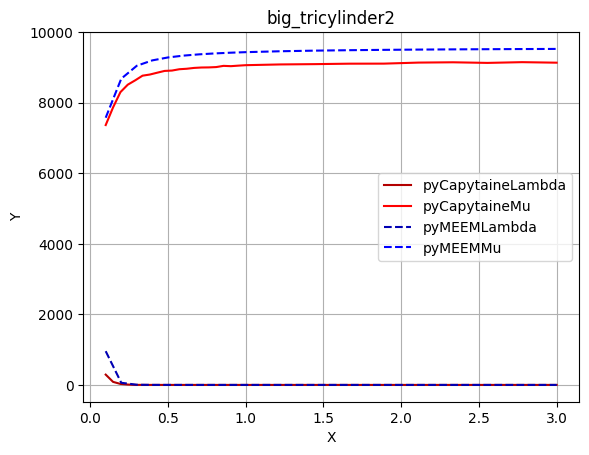

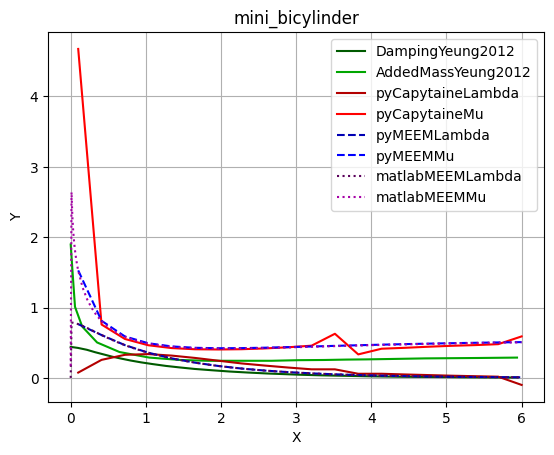

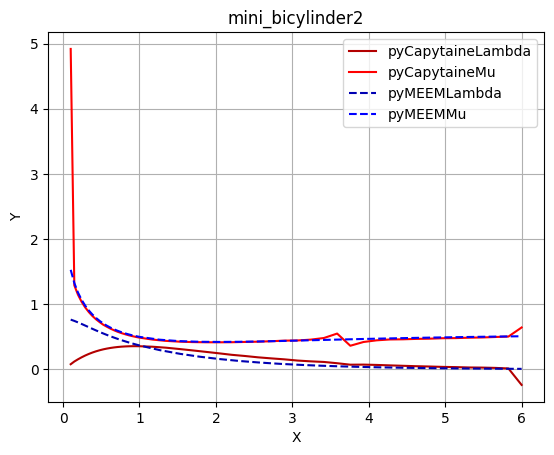

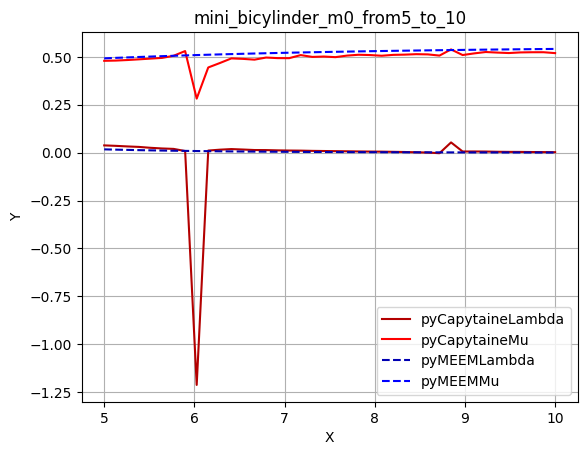

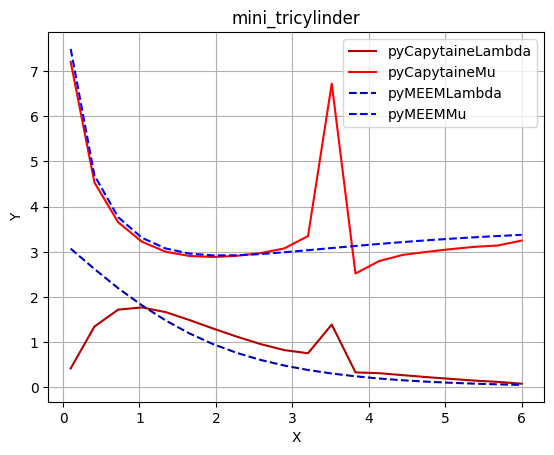

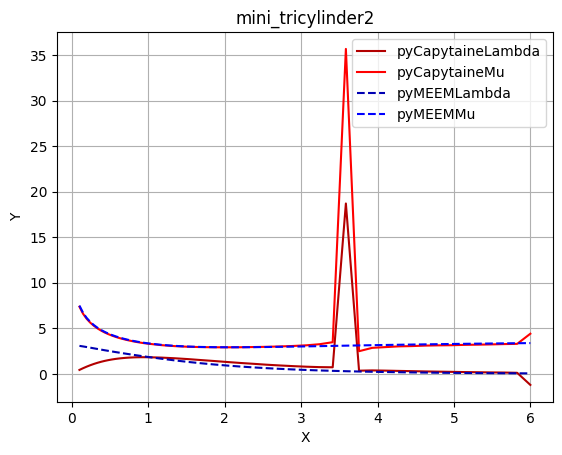

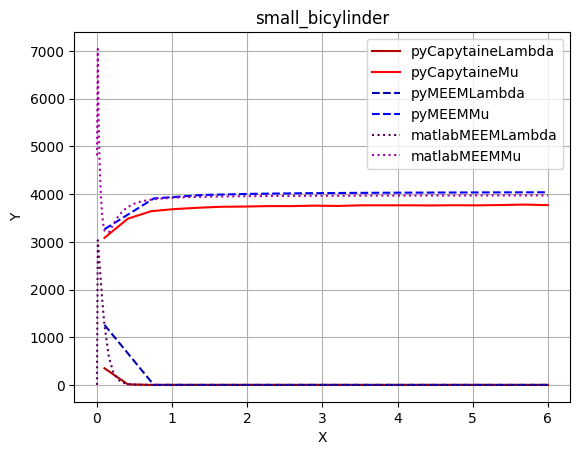

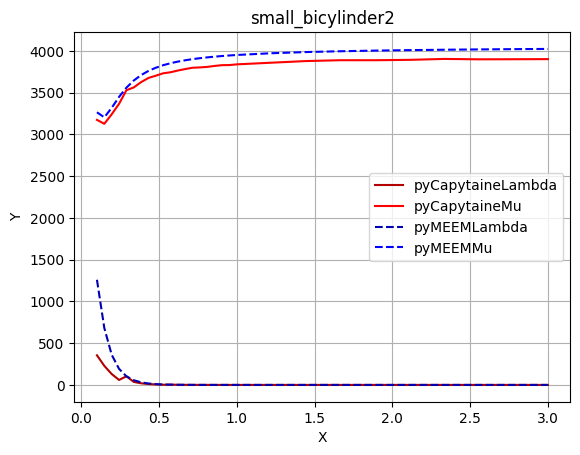

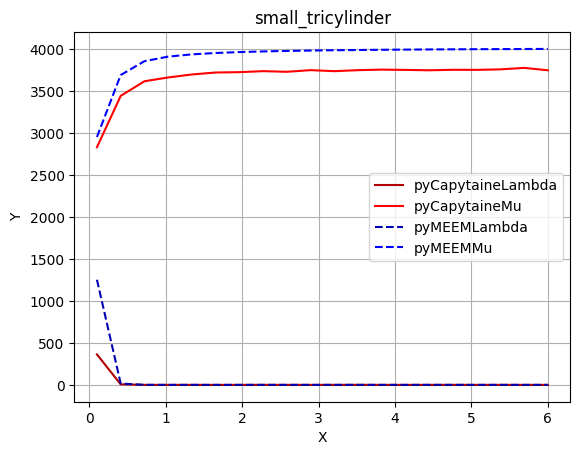

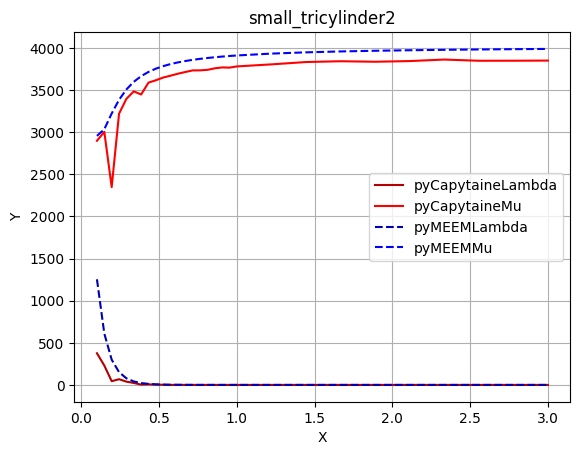

In [10]:

data_folder = Path("csv_data")
csv_files = sorted(data_folder.glob("*.csv"))

base_colors = {
    "Capytaine": "red",
    "pyMEEM": "blue",
    "Yeung": "green",
    "matlabMEEM": "purple",
}

base_styles = {
    "Capytaine": "-",
    "pyMEEM": "--",
    "Yeung": "-",
    "matlabMEEM": ":",
}

def adjust_brightness(color_name, factor):
    rgb = to_rgb(color_name)
    adjusted = tuple(min(1, max(0, c * factor)) for c in rgb)
    return adjusted

def get_color(label):
    for key, base_color in base_colors.items():
        if key in label:
            if "Mu" in label or "AddedMass" in label:
                return adjust_brightness(base_color, 1.3), base_styles[key]  # brighter
            elif "Lambda" in label or "Damping" in label:
                return adjust_brightness(base_color, 0.7), base_styles[key]  # darker
            else:
                return base_color, "--"
    return "gray", "--"  # fallback color if no match

# Main plotting loop
for csv_path in csv_files:
    df = pd.read_csv(csv_path)
    fig, ax = plt.subplots()
    
    for col in df.columns:
        if col.endswith('_x'):
            label = col[:-2]
            x = df[col]
            y = df[label + '_y']
            color, linestyle = get_color(label)
            ax.plot(x, y, label=label, color=color, linestyle = linestyle)
    
    ax.set_title(csv_path.stem)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()
    ax.grid(True)
    plt.show()